### 1. Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Data Collection

In [2]:
car_df = pd.read_csv("car data.csv")

In [3]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_df.shape

(301, 9)

### 3. Data Cleaning

In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


There are no missing values in dataset

In [6]:
car_df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#### 3.1 Removing Duplicate Values

In [7]:
car_df.duplicated().sum()

2

In [8]:
car_df = car_df.drop_duplicates(keep='first')

In [9]:
car_df.duplicated().sum()

0

In [10]:
car_df.shape

(299, 9)

#### 3.2 Analyzing Distribution of Categorical Data

In [11]:
print(car_df.Fuel_Type.value_counts())
print(car_df.Selling_type.value_counts())
print(car_df.Transmission.value_counts())
print(car_df.Owner.value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64
Owner
0    288
1     10
3      1
Name: count, dtype: int64


#### 3.3 Encoding Categorical Data

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
# encoding fuel_type column
car_df["Fuel_Type"] = encoder.fit_transform(car_df["Fuel_Type"])

# encoding selling_type column
car_df["Selling_type"] = encoder.fit_transform(car_df["Selling_type"])

# encoding TRansmission column
car_df["Transmission"] = encoder.fit_transform(car_df["Transmission"])


In [14]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


### 4.EDA

In [15]:
import seaborn as sns

In [16]:
corr = car_df[["Selling_Price", "Present_Price", "Driven_kms", "Fuel_Type", "Selling_type", "Transmission"]].corr()

<AxesSubplot:>

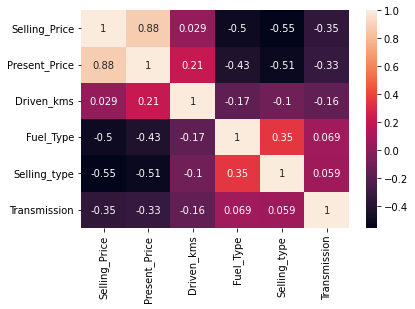

In [17]:
sns.heatmap(corr, annot=True)

### 5. Model Building

#### 5.1 Splitting data and target

In [18]:
x = car_df.drop(["Car_Name", "Selling_Price"], axis=1)
y = car_df["Selling_Price"]

#### 5.2 Splitting Training and Testing Data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.1, random_state=2)

#### 5.3 Model Training an Evaluation

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor , AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor

In [38]:
from sklearn.metrics import r2_score, mean_absolute_error

In [39]:
Ln = LinearRegression()
R = Ridge(alpha=1.0)
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor(n_estimators=130)
GBR = GradientBoostingRegressor()
ADA = AdaBoostRegressor()
BR = BaggingRegressor()
ETR = ExtraTreesRegressor()

In [40]:
models = {
    "linearRegression" : Ln,
    "Ridge" : R,
    "DecisionTreeRregressor" : DTR,
    "RandomForestRegressor" : RFR,
    "GradientBoostingRegressor" : GBR,
    "AdaBoostRegressor" : ADA,
    "BaggingRegressor" : BR,
    "ExtraTreesRegressor" : ETR
}

In [41]:
r2_scores = []
mae_scores = []

for name,model in models.items():
    model.fit(x_train, y_train)
    y_pred1 = model.predict(x_test)
    R2 = r2_score(y_test,y_pred1)
    MAE = mean_absolute_error(y_test,y_pred1)

    r2_scores.append(R2)
    mae_scores.append(MAE)

In [42]:
performace = pd.DataFrame({"Algoriths": models.keys(), "R2SCORE": r2_scores, "MeanAbsoluteError": mae_scores}).sort_values("MeanAbsoluteError",ascending=True)

In [43]:
performace

,Algoriths,R2SCORE,MeanAbsoluteError
3,RandomForestRegressor,0.977541,0.417828
7,ExtraTreesRegressor,0.973574,0.462947
6,BaggingRegressor,0.970048,0.498833
4,GradientBoostingRegressor,0.947659,0.594730
2,DecisionTreeRregressor,0.949145,0.623000
5,AdaBoostRegressor,0.935692,0.828968
0,linearRegression,0.856187,0.937254
1,Ridge,0.856016,0.937788


The r2 score of  ExtraTreesRegressor is high and MeanAbsoluteError is low compare to other models so it will be considered as efficient model

### 6. Testing the Model

In [44]:
input_data = (2017, 23.15, 11000, 2, 0, 0, 0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = ETR.predict(input_data_reshaped)
print(f"Predicted class is: {prediction[0]}")

Predicted class is: 19.75


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


In [45]:
def car_price_predictor(Year, Present_Price, Driven_kms, Fuel_Type, Selling_type, Transmission, Owner):
    prediction1 = ETR.predict([[Year, Present_Price, Driven_kms, Fuel_Type,Selling_type,Transmission,Owner]])
    return f"Selling Price: {prediction1[0]:.2f} Lakhs"

In [46]:
import gradio as gr

In [47]:
interface = gr.Interface(
    fn=car_price_predictor,
    inputs=[
        gr.Number(label="Year"),
        gr.Number(label="Present Price"),
        gr.Number(label="Driven kms"),
        gr.Number(label="Fuel Type Petrol = 2, Diesel = 1, CNG = 0"),
        gr.Number(label="Selling type Dealer = 0, Individual = 1"),
        gr.Number(label="Transmission Manual = 1, Automatic = 0"),
        gr.Number(label="Owner")
    ],
    outputs="text",
    title="Car Price Prediction"
)

In [48]:
interface.launch()

Running on local URL:  http://127.0.0.1:7860

Thanks for being a Gradio user! If you have questions or feedback, please join our Discord server and chat with us: https://discord.gg/feTf9x3ZSB

To create a public link, set `share=True` in `launch()`.


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
